# Web3: Scraping Web Data

In [1]:
# import statements
import requests
from bs4 import BeautifulSoup # bs4 is the module, BeautifulSoup is the type

### Warmup 1: HTML table and hyperlinks
In order to scrape web pages, you need to know the HTML syntax for tables and hyperlinks.

TODO: Add another row or two to the table below

<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://stat.wisc.edu/">Statistics</a></td>
  </tr>
   <tr>
    <td>UW-Madison</td>
    <td><a href = "https://cdis.wisc.edu/">CDIS</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td><a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences</a></td>
    </tr>
</table>

### Warmup 2: Scraping data from syllabus page

In [6]:
# Get this page using requests.  
url = "https://cs220.cs.wisc.edu/f22/syllabus.html"
r = requests.get(url, verify=False)

# make sure there is no error


# read the entire contents of the page into a single string variable
html_str = ...


# split the contents into list of strings using newline separator
#html_lines = ...
#html_lines[:10]

/Users/andrewkuemmel/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cs220.cs.wisc.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


['<!doctype html>',
 '<html lang="en">',
 '  <head>',
 '    <meta charset="utf-8">',
 '    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">',
 '    <meta name="description" content="">',
 '    <meta name="author" content="">',
 '',
 '    <!-- Google Auth stuff -->',
 '    <meta name="google-signin-scope" content="profile email">']

#### Warmup 2: find all lines with 'Kuemmel'

In [13]:


# Takeaway:  It would be nice if there were a module that could make finding easy!

<li>Andrew Kuemmel (Teaching Faculty - Department of Computer Sciences) kuemmel@wisc.edu</li>


### Learning Objectives:

- Using the Document Object Model of web pages
    - describe the 3 things a DOM element may contain, and give examples of each
    - given an html string, identify the correct DOM tree of elements
- Create BeautifulSoup objects from an html string and use prettify to display
- Use the BeautifulSoup methods 'find' and 'find_all' to find particular elements by their tag
- Inspect a BeautufulSoup element to determine the contents of a web page using get_text(), children, and attrs
- Use BeautifulSoup to scrape a live web site. 

### Document Object Model

In order to render a HTML page, most web browsers use a tree structure called Document Object Model (DOM) to represent the HTML page as a hierarchy of elements.

<div>
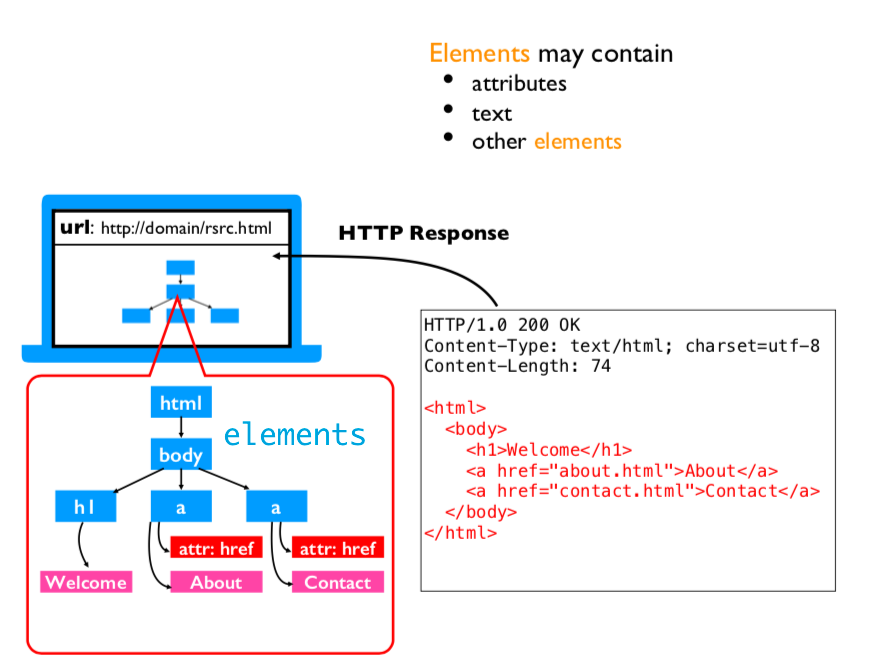
</div>

### Take a look at the HTML in the below cell.

<b>To Do List</b>
<ul>
    <li>Eat Healthy</li>
    <li>Sleep <b>More</b></li>
    <li>Exercise</li>
</ul>

### BeautifulSoup constructor
- takes a html, as a string, as argument  and parses it
- Syntax: `BeautifulSoup(<html_string>, "html.parser")`
- Second argument specifies what kind of parsing we want done

In [14]:
html_string = "<b>To Do List</b><ul><li>Eat Healthy</li><li>Sleep <b>More</b></li><li>Exercise</li></ul>"

bs_obj = BeautifulSoup(..., "html.parser")

type(bs_obj)

bs4.BeautifulSoup

## BeautifulSoup operations
- `prettify()`        returns a formatted representation of the raw HTML

### A  BeautifulSoup object can be searched for elements using:
- `find("")`         returns the first element matching the tag string, None otherwise
- `find_all("")`     returns an iterable of all matching elements (HTML 'tags'), empty iterable otherwise

### Beautiful Soup Elements can be inspected by using:
- `text`    returns the text associated with this element, if applicable; does not return the child elements associated with that element
- `.children`      all children of this element (can be converted into a list)
- `.attrs`          the atribute associated with that element / tag.

`prettify()` returns a formatted representation of the raw HTML

In [15]:
# bs_obj.prettify()

'<b>\n To Do List\n</b>\n<ul>\n <li>\n  Eat Healthy\n </li>\n <li>\n  Sleep\n  <b>\n   More\n  </b>\n </li>\n <li>\n  Exercise\n </li>\n</ul>'

`find` returns the first HTML 'tag' matching the string "b"

In [16]:
# bs_obj.find("b")

<b>To Do List</b>

What is the type of find's return value?

bs4.element.Tag

How do we extract the text of the "b" element and what is its type?

'To Do List'

`find` returns None if it cannot find that element.

In [28]:
# assert that this html string has a <ul> tag
assert bs_obj.find("ul") ...

# assert that this does not have an <a> tag
assert bs_obj.find("a") ...

`find_all` returns an iterable of all matching elements (HTML 'tags') matching the string "b"

In [33]:
bold_elements = ...
bold_elements

[<b>To Do List</b>, <b>More</b>]

What is the type of return value of `find_all`?

In [34]:
type(bold_elements)

bs4.element.ResultSet

In [35]:
type(bold_elements[0])

bs4.element.Tag

Use a for loop to print the text of each "b" element.

In [36]:
for element in bold_elements:
    print(...)
    

To Do List
More


Unlike `find`, `find_all` returns an empty iterable, when there are no matching elements.

In [37]:
# only searches for elements, not text
# print(bs_obj.find_all("Sleep"))  
# if not present returns None
# print(bs_obj.find("Sleep"))      

[]
None


You can invoke `find` or `find_all` on other BeautifulSoup object instances.

Find all `li` elements and find `b` element inside the second `li` element.

In [41]:
li_elements = ...
li_elements

'More'

In [42]:
li_elements[1].find("b")

<b>More</b>

In [43]:
li_elements[1].find("b").text

'More'

### DOM trees are hierarchical. You can use `.children` on any element to gets its children.



Find all the children of "ul" element.

In [48]:
ul_elements = ...
ul_elements.children

[<li>Eat Healthy</li>, <li>Sleep <b>More</b></li>, <li>Exercise</li>]

Find text of every child element.

['Eat Healthy', 'Sleep More', 'Exercise']

Notice that `get_text()` only returns the actual text and not the HTML formatting. For example, part of second child element's text is enclosed within `<b>More</b>`. 

To understand `attribute`, let's go back to the table from warmup 1.


New syntax, you can use `"""some really long string"""` to split a string across multiple lines.

In [72]:
html_string = """
<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://stat.wisc.edu/">Statistics</a></td>
  </tr>
   <tr>
    <td>UW-Madison</td>
    <td><a href = "https://cdis.wisc.edu/">CDIS</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td><a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences</a></td>
    </tr>
</table>
"""

Find the table headers.

In [52]:
bs_obj = BeautifulSoup(html_string, "html.parser")
th_elements = ...
th_elements

[<th>University</th>, <th>Department</th>]

Find the first anchor element, extract its text.

In [53]:
anchor_element = ...
anchor_element

'Computer Sciences'

You can get the attributes associated with an element using `.attrs` on that element object. Return value will be a `dict` mapping each attribute to its value.

Now, let's get the attributes of the anchor element.

In [54]:
anchor_element.attrs

{'href': 'https://www.cs.wisc.edu/'}

What is the return value type of `.attrs`?

In [55]:
type(anchor_element.attrs)

dict

Extract the hyperlink.

'https://www.cs.wisc.edu/'

Extract hyperlinks for each department and populate department name and link into a `dict`.

In [64]:
department_urls = {} # Key: department name; Value: website URL

anchor_elements = bs_obj.find_all("a")
anchor_elements


Computer Sciences https://www.cs.wisc.edu/
Statistics https://stat.wisc.edu/
CDIS https://cdis.wisc.edu/
Electrical Engineering and Computer Sciences https://eecs.berkeley.edu/


{'Computer Sciences': 'https://www.cs.wisc.edu/',
 'Statistics': 'https://stat.wisc.edu/',
 'CDIS': 'https://cdis.wisc.edu/',
 'Electrical Engineering and Computer Sciences': 'https://eecs.berkeley.edu/'}

#### Self-practice: Find all anchor links that include piazza in the CS 220 page

In [71]:
# Get this page using requests.  
url = "https://cs220.cs.wisc.edu/f22/syllabus.html"
r = ...
# make sure there is no error


# read the entire contents of the page into a single string variable
html_data = ...

# create a BeautifulSoup object
bs_obj = ...

# find all anchor elements
anchor_elements = ..

# print out all URLS to piazza

/Users/andrewkuemmel/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cs220.cs.wisc.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


['https://piazza.com/wisc/fall2022/cs220/home',
 'https://piazza.com/wisc/fall2022/cs220/home']

### Scraping Tables
### Parsing small_movies html table to extract `small_movies.json`

### Step 1: Read `small_movies.html` content into a variable

### Step 2: Initialize BeautifulSoup object instance

### Step 3: Find table element

### Step 4: Find all th tags, to parse the table header

### Step 5: Scrape second row, convert data to appropriate types, and populate data into a row dictionary
- "Year", "Runtime": `int` conversion
- "Revenue": format_revenue(...) conversion
- "Rating": `float` conversion

In [ ]:
def format_revenue(revenue):
    if type(revenue) == float: # need this in here if we run code multiple times
        return revenue
    elif revenue[-1] == 'M': # some have an "M" at the end
        return float(revenue[:-1]) * 1e6
    else:                    # otherwise, assume millions.
        return float(revenue) * 1e6

In [ ]:
# Why second row? Because first row has the header information.



### Step 6: Scrape all rows, convert data to appropriate types, and populate data into a row dictionary and append row dictionaries into a list
- "Year", "Runtime": `int` conversion
- "Revenue": format_revenue(...) conversion
- "Rating": `float` conversion

You can compare your parsing output to `small_movies.json` file contents, to confirm your result.

### Final step: convert steps 1 through 6 into a function and use that function to parse `full_movies.html` file.

In [ ]:
full_movies_data = parse_html("full_movies.html")
# full_movies_data